In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [36]:
data= pd.read_csv('housing.csv') 
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [37]:
data.describe()
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

✅ So we do need OHE for:[ as they are the object that is string not int ]

mainroad

guestroom

basement

hotwaterheating

airconditioning

prefarea

furnishingstatus

✅ We scale:

area

bedrooms

bathrooms

stories

parking

In [38]:
numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_features = [
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning',
    'prefarea', 'furnishingstatus'
]


In [39]:
# OHE
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

In [40]:
# scale numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_encoded[numeric_features] = scaler.fit_transform(data_encoded[numeric_features])

In [41]:
data_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,1.046726,1.403419,1.421812,1.378217,1.517692,True,False,False,False,True,True,False,False
1,12250000,1.757010,1.403419,5.405809,2.532024,2.679409,True,False,False,False,True,False,False,False
2,12250000,2.218232,0.047278,1.421812,0.224410,1.517692,True,False,True,False,False,True,True,False
3,12215000,1.083624,1.403419,1.421812,0.224410,2.679409,True,False,True,False,True,True,False,False
4,11410000,1.046726,1.403419,-0.570187,0.224410,1.517692,True,True,True,False,True,False,False,False


In [42]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [46]:
cols_to_convert = [
    'mainroad_yes', 'guestroom_yes', 'basement_yes', 
    'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes',
    'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'
]

for col in cols_to_convert:
    # Convert string "True"/"False" → boolean → int
    data_encoded[col] = data_encoded[col].astype(str).str.strip()  # remove spaces if any
    data_encoded[col] = data_encoded[col].map({'True': 1, 'False': 0, True: 1, False: 0}).astype(int)


In [47]:
data_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,1.046726,1.403419,1.421812,1.378217,1.517692,1,0,0,0,1,1,0,0
1,12250000,1.757010,1.403419,5.405809,2.532024,2.679409,1,0,0,0,1,0,0,0
2,12250000,2.218232,0.047278,1.421812,0.224410,1.517692,1,0,1,0,0,1,1,0
3,12215000,1.083624,1.403419,1.421812,0.224410,2.679409,1,0,1,0,1,1,0,0
4,11410000,1.046726,1.403419,-0.570187,0.224410,1.517692,1,1,1,0,1,0,0,0


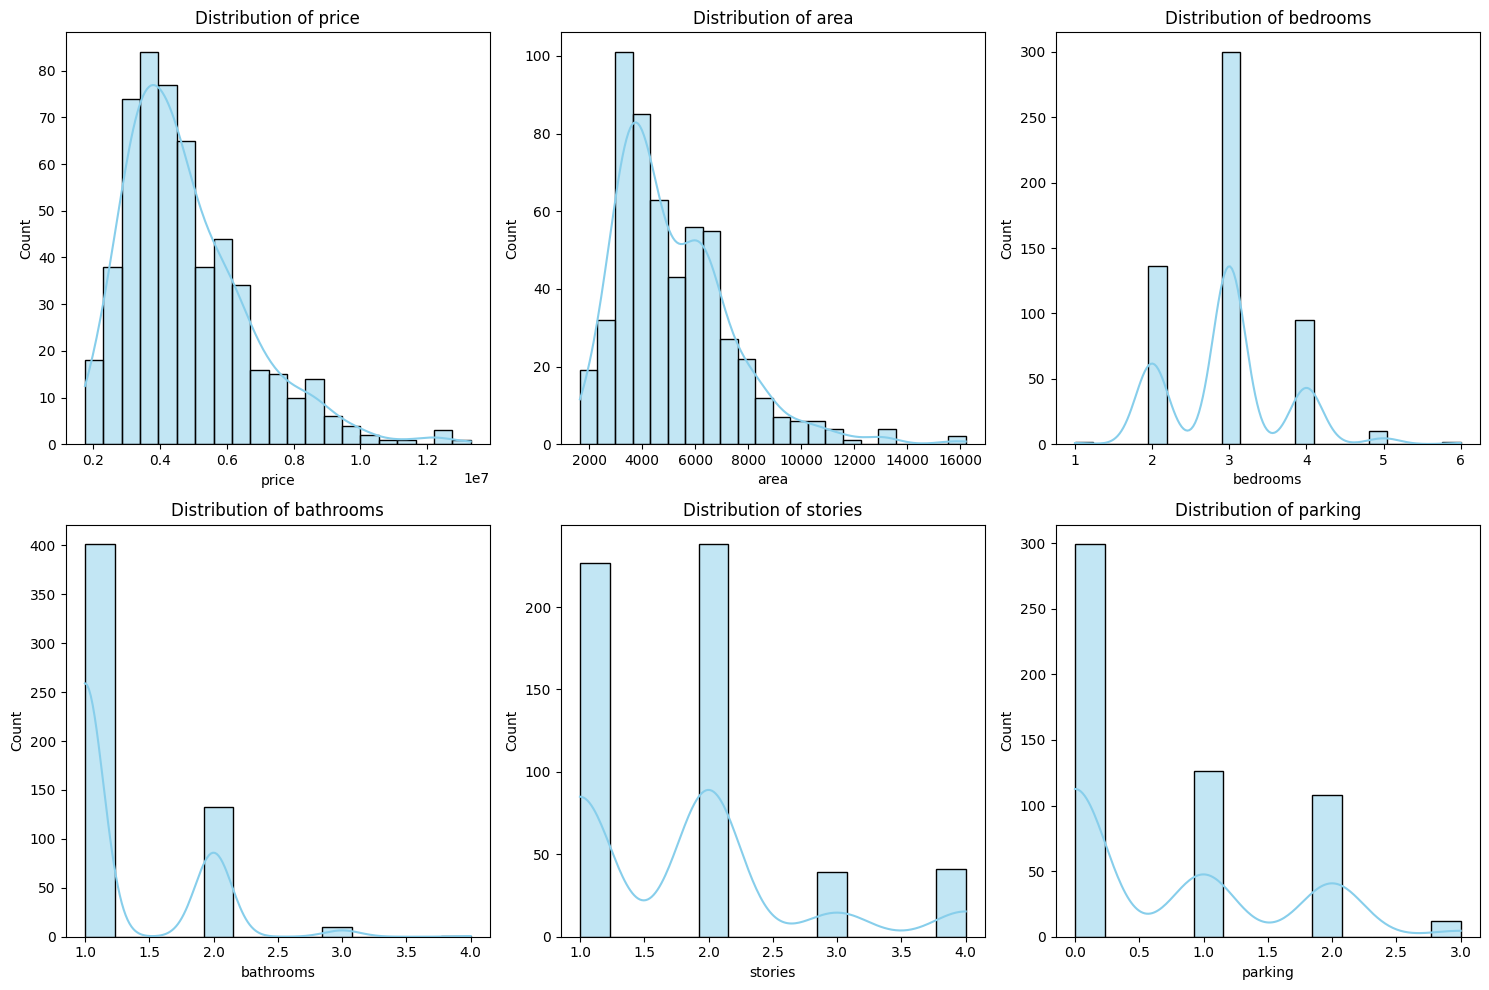

In [44]:

numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

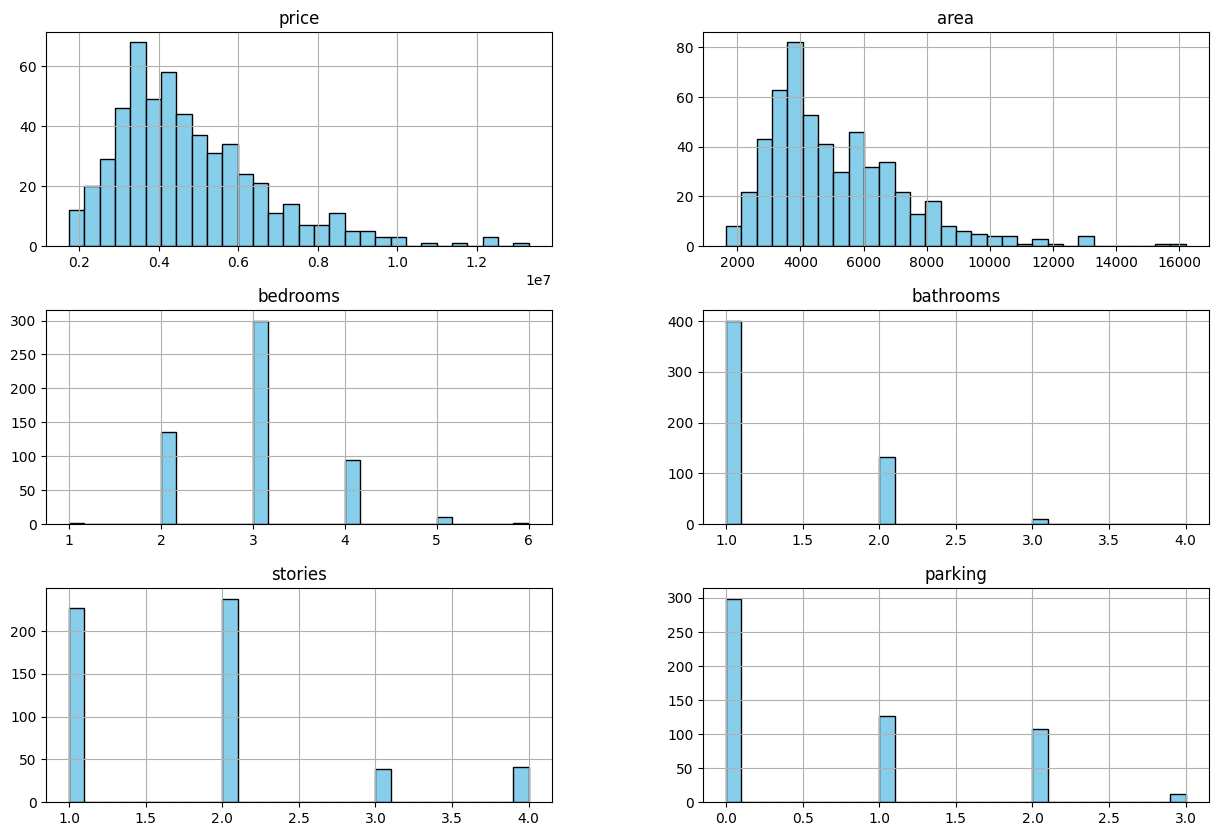

In [45]:
data.hist(figsize=(15, 10), bins=30, color='skyblue', edgecolor='black')


## problem here is 
#### Most values are low (cheap houses, small areas).

 #### A few values are very high (mega-mansions).

 #### This creates right skewness → the model tends to "focus" too much on the big values and fails to predict the common ones well.

# Log transformation
#### Keep them but make them less extreme [ meaning scale them down ]
##### price→log(price)   so Price (₹)	Log(price)
                            200,000	 becomes    12.2

In [56]:
data_encoded['price'] = np.log1p(data_encoded['price'])
data_encoded['area'] = np.log1p(data_encoded['area'])
data_encoded['bathrooms'] = np.log1p(data_encoded['bathrooms'])
data_encoded['stories'] = np.log1p(data_encoded['stories'])
data_encoded['parking'] = np.log1p(data_encoded['parking'])

c:\Users\Sujal\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'mainroad_yes'}>,
        <Axes: title={'center': 'guestroom_yes'}>],
       [<Axes: title={'center': 'basement_yes'}>,
        <Axes: title={'center': 'hotwaterheating_yes'}>,
        <Axes: title={'center': 'airconditioning_yes'}>,
        <Axes: title={'center': 'prefarea_yes'}>],
       [<Axes: title={'center': 'furnishingstatus_semi-furnished'}>,
        <Axes: title={'center': 'furnishingstatus_unfurnished'}>,
        <Axes: >, <Axes: >]], dtype=object)

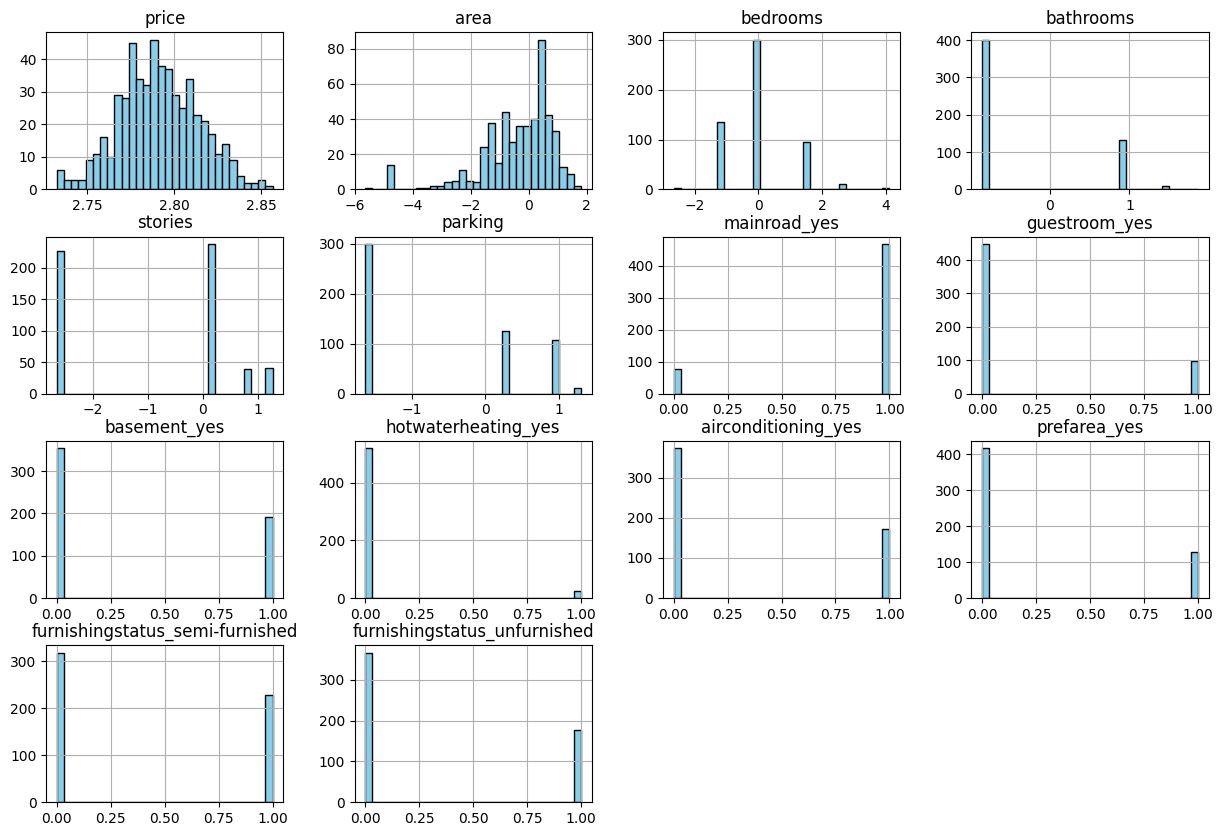

In [57]:
data_encoded.hist(figsize=(15, 10), bins=30, color='skyblue', edgecolor='black')

In [58]:
data_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,2.856658,0.716242,1.403419,0.884516,0.866351,0.923343,1,0,0,0,1,1,0,0
1,2.851922,1.014147,1.403419,1.857205,1.261871,1.302752,1,0,0,0,1,0,0,0
2,2.851922,1.168832,0.047278,0.884516,0.202459,0.923343,1,0,1,0,0,1,1,0
3,2.851757,0.734109,1.403419,0.884516,0.202459,1.302752,1,0,1,0,1,1,0,0
4,2.847812,0.716242,1.403419,-0.844404,0.202459,0.923343,1,1,1,0,1,0,0,0


## feature selection

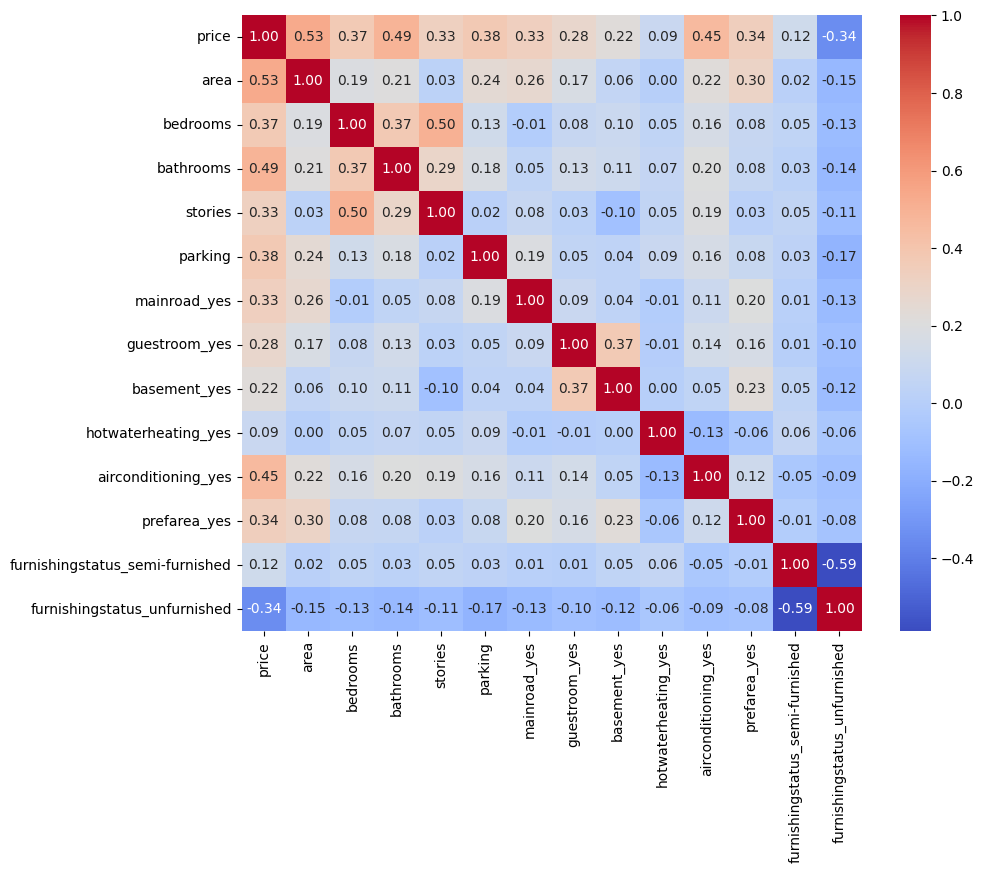

price                              1.000000
area                               0.531359
bathrooms                          0.487560
airconditioning_yes                0.454055
parking                            0.379079
bedrooms                           0.369289
prefarea_yes                       0.340380
mainroad_yes                       0.331299
stories                            0.326274
guestroom_yes                      0.277400
basement_yes                       0.219859
furnishingstatus_semi-furnished    0.123584
hotwaterheating_yes                0.088445
furnishingstatus_unfurnished      -0.340803
Name: price, dtype: float64


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data_encoded.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# See top correlations with price
print(corr['price'].sort_values(ascending=False))


In [62]:
features = [
    'area',
    'bathrooms',
    'airconditioning_yes',
    'parking',
    'bedrooms',
    'prefarea_yes',
    'mainroad_yes',
    'furnishingstatus_unfurnished'  # negative correlation but useful
]


In [71]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            545 non-null    float64
 1   area                             494 non-null    float64
 2   bedrooms                         545 non-null    float64
 3   bathrooms                        545 non-null    float64
 4   stories                          545 non-null    float64
 5   parking                          545 non-null    float64
 6   mainroad_yes                     545 non-null    int64  
 7   guestroom_yes                    545 non-null    int64  
 8   basement_yes                     545 non-null    int64  
 9   hotwaterheating_yes              545 non-null    int64  
 10  airconditioning_yes              545 non-null    int64  
 11  prefarea_yes                     545 non-null    int64  
 12  furnishingstatus_semi-

In [72]:
data_encoded = data_encoded.dropna()

In [74]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            494 non-null    float64
 1   area                             494 non-null    float64
 2   bedrooms                         494 non-null    float64
 3   bathrooms                        494 non-null    float64
 4   stories                          494 non-null    float64
 5   parking                          494 non-null    float64
 6   mainroad_yes                     494 non-null    int64  
 7   guestroom_yes                    494 non-null    int64  
 8   basement_yes                     494 non-null    int64  
 9   hotwaterheating_yes              494 non-null    int64  
 10  airconditioning_yes              494 non-null    int64  
 11  prefarea_yes                     494 non-null    int64  
 12  furnishingstatus_semi-furni

## 2️⃣ Train/test split

In [75]:
from sklearn.model_selection import train_test_split
X =data_encoded[features]
y =data_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 3️⃣ Pick two baseline models

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 4️⃣ Evaluate

In [78]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

for name, model in [('Linear Regression', lr), ('Random Forest', rf)]:
    y_pred = model.predict(X_test)
    print(f"{name}:")
    print("  R²:", r2_score(y_test, y_pred))
    print("  RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print()


Linear Regression:
  R²: 0.6528973298013268
  RMSE: 0.015063753375171941

Random Forest:
  R²: 0.6255131037761641
  RMSE: 0.015646691950903523

